In [18]:
from qutip import destroy, tensor, qeye
import scienceplots
import lovelyplots
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from qutip import destroy, tensor, qeye, average_gate_fidelity
from scipy.optimize import curve_fit
from corral_crowding.detuning_fit import compute_infidelity_parameters, decay_fit

In [19]:
# Define detuning range (MHz)
detuning_list = np.linspace(50, 1000, 64)
infidelity_params, fidelity_results = compute_infidelity_parameters(
    detuning_list, lambdaq=0.08, eta=1.8, alpha=120e6, g3=60e6
)

/home/evm9/corral_crowding/src/corral_crowding/detuning_fit.py:28: RuntimeWarning: invalid value encountered in power
  return a * ((detuning + d) ** -b) + c


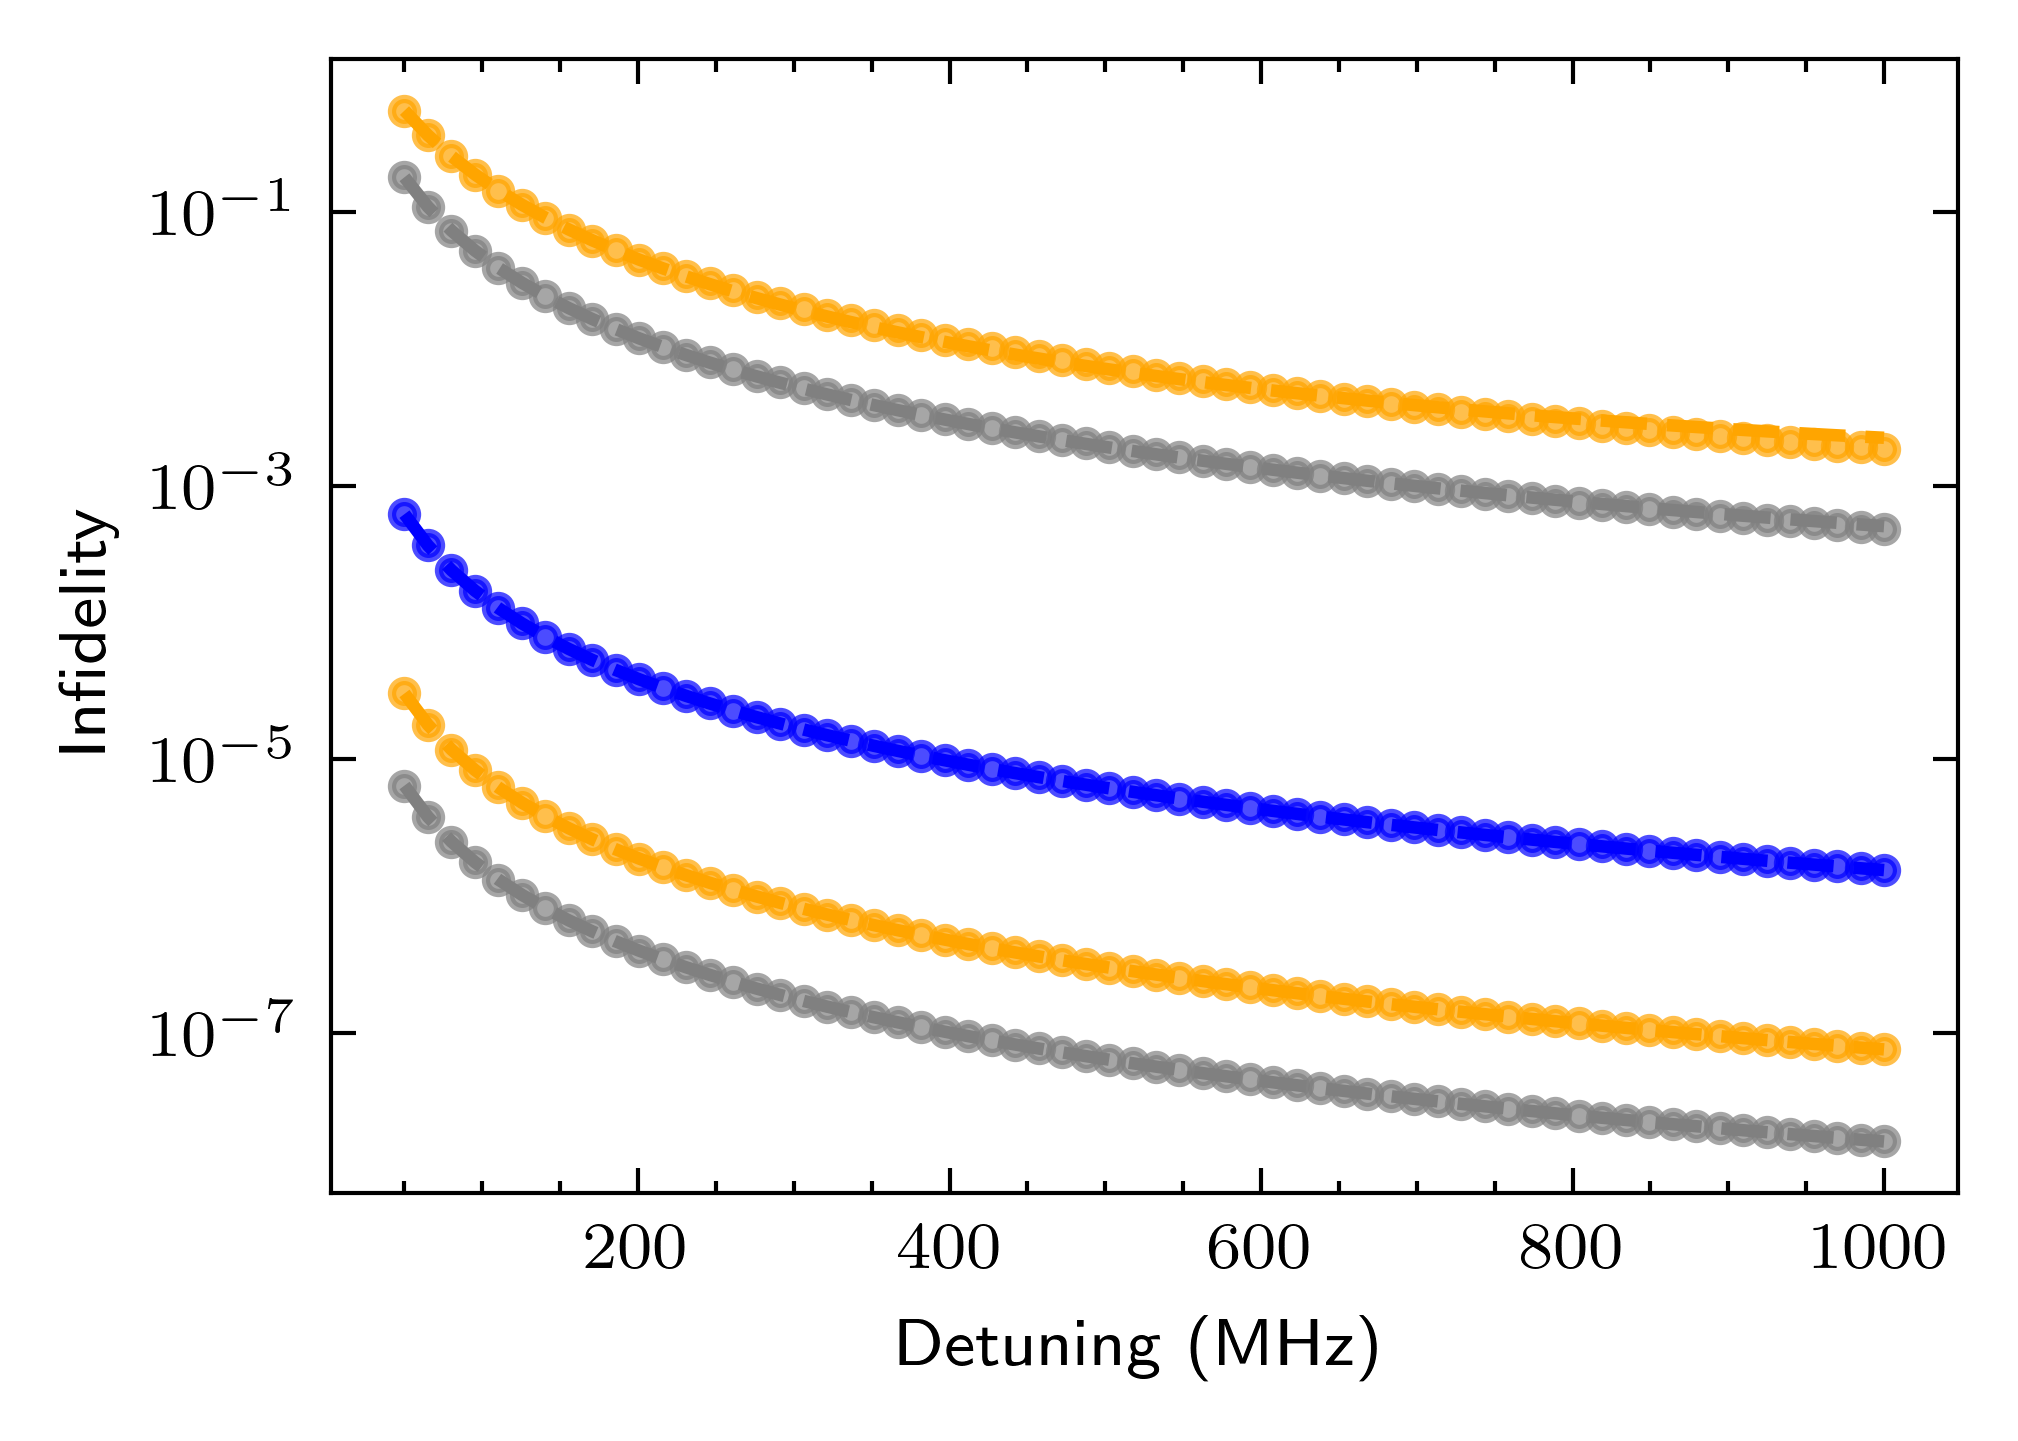

In [20]:
# === Plotting with Clear Distinction Between Data and Fit === #
color_map = {
    "qubit-qubit": ("blue", "-"),
    "snail-qubit": ("orange", "-"),
    "snail-qubit (inter)": ("orange", ":"),
    "qubit-sub": ("gray", "-"),
    "qubit-sub (inter)": ("gray", ":"),
}

# Plot raw data and damped decay fits
with plt.style.context(["ieee", "use_mathtext", "science"]):
    fig, ax = plt.subplots(figsize=(3.5, 3))

    # Plot raw data
    for label, fidelities in fidelity_results.items():
        color, linestyle = color_map[label]
        ax.scatter(
            detuning_list,
            fidelities,
            label=f"{label} (QuTiP)",
            color=color,
            marker=".",
            # s=20,
            alpha=0.7,
        )

    # Plot damped decay fits
    for label, params in infidelity_params.items():
        fit_curve = decay_fit(detuning_list, *params)
        color, linestyle = color_map[label]
        ax.plot(
            detuning_list,
            fit_curve,
            label=f"{label} (Fit)",
            color=color,
            linestyle="--",
            linewidth=1.5,
        )

    ax.set_xlabel("Detuning (MHz)")
    ax.set_ylabel("Infidelity")
    ax.set_yscale("log")
    # ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

    # Improved legend
    # ax.legend(loc="upper right", fontsize=8, frameon=True)
    fig.subplots_adjust(bottom=0.25)
    fig.savefig("fidelity_vs_terms_damped_fit.pdf", bbox_inches="tight")

plt.show()